In [7]:
## Import appropriate files

import sys
sys.path.append("..")

import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import realcontour_nd, realcontour_1D
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from gaussian import Gaussian

%load_ext autoreload
%load_ext line_profiler

%autoreload 2

ImportError: attempted relative import with no known parent package

In [ ]:
## Define run function

def run_paramset()

In [3]:
## Pick test function and test dimension
ndim=3

testfunction = Gaussian(ndim)


In [4]:
## Initialize Model 
lamb = 1
delta = 0.6
Nstep = 150
dt_init = 8e-3
thresh =-8
tmax = dt_init*150

contour = realcontour_nd(20, (-1.5,1.5,-1.5,1.5, -1.5, 1.5))
plind = plmodel(contour, testfunction.expfun, grad=testfunction.gradh, expargs=testfunction.expargs)


In [5]:
%lprun -f plind.descend plind.descend(delta, thresh, tmax, dt_init)

/home/skellig/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:179: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)
../plind/descend/core.py:40: RuntimeWarning: divide by zero encountered in true_divide
  delta = np.min((np.divide(tol,2*R))**(1/4))


total steps: 14 current time: 1.2207516348709586


In [38]:
plind.integrate()
print(plind.integral)
print(testfunction.integral(*testfunction.expargs))
print(np.imag(testfunction.integral(*testfunction.expargs))/np.imag(plind.integral))

((3.926902420518428-3.9294529571784564j), 5.0978590340940765e-08)
(-3.9374024864306048+3.937402486430605j)
[-1.00202306         inf]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [16]:
len(plind.contour.points)

125

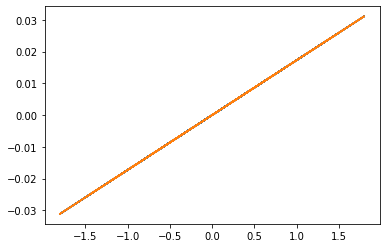

In [17]:
plt.figure()
plt.plot(np.real(plind.contour.points[:,0]), (np.real(plind.contour.points[:,0])-np.imag(plind.contour.points[:,0])))
plt.plot(np.real(plind.contour.points[:,1]), (np.real(plind.contour.points[:,1])-np.imag(plind.contour.points[:,1])))
plt.show()

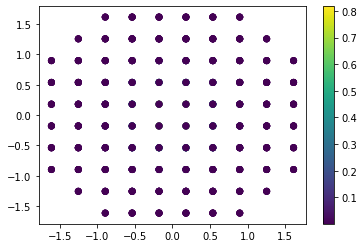

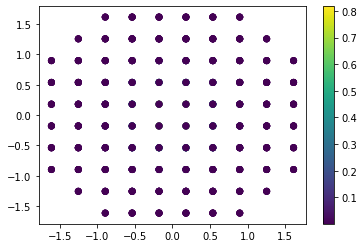

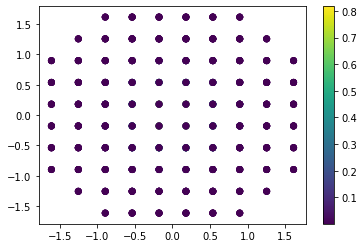